In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams
from scipy import stats
from distfit import distfit
from scipy.stats import gaussian_kde
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
#rcParams['text.usetex'] = True


In [2]:
np.random.seed(0)
n = 100000
df_beta = pd.DataFrame({'beta_1':np.random.beta(0.5,0.5,n),
                     'beta_2':np.random.beta(5,1,n),
                     'beta_3':np.random.beta(1,3,n),
                     'beta_4':np.random.beta(2,2,n),
                     'beta_5':np.random.beta(2,5,n)})
                         
n = 100000
df_gamma = pd.DataFrame({'beta_1':np.random.beta(0.5,0.5,n),
                     'beta_2':np.random.beta(5,1,n),
                     'beta_3':np.random.beta(1,3,n),
                     'beta_4':np.random.beta(2,2,n),
                     'beta_5':np.random.beta(2,5,n)})
                         

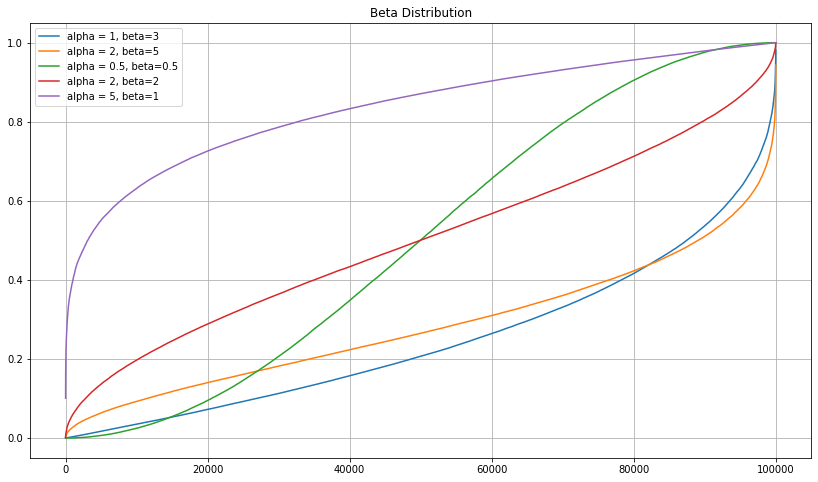

In [44]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(0, n, 1), np.sort(df_beta['beta_3']),  label='alpha = 1, beta=3')
plt.plot(np.arange(0, n, 1), np.sort(df_beta['beta_5']),  label='alpha = 2, beta=5')
plt.plot(np.arange(0, n, 1), np.sort(df_beta['beta_1']),  label='alpha = 0.5, beta=0.5')
plt.plot(np.arange(0, n, 1), np.sort(df_beta['beta_4']),  label='alpha = 2, beta=2')
plt.plot(np.arange(0, n, 1), np.sort(df_beta['beta_2']),  label='alpha = 5, beta=1')
plt.legend()
plt.grid()
plt.title('Beta Distribution')
plt.show()

In [7]:


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(df_beta.values)

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 6.4514763] [loc=0.474 scale=0.308]
[distfit] >[expon     ] [0.00 sec] [RSS: 10.8049370] [loc=0.000 scale=0.474]
[distfit] >[pareto    ] [32.5 sec] [RSS: 11.4017217] [loc=-1887845.387 scale=1887845.387]
[distfit] >[dweibull  ] [17.6 sec] [RSS: 6.0125271] [loc=0.504 scale=0.302]
[distfit] >[t         ] [10.5 sec] [RSS: 6.4517497] [loc=0.474 scale=0.308]
[distfit] >[genextreme] [15.9 sec] [RSS: 5.9047201] [loc=0.362 scale=0.293]
[distfit] >[gamma     ] [12.6 sec] [RSS: 4.3026115] [loc=-0.071 scale=0.214]
[distfit] >[lognorm   ] [13.0 sec] [RSS: 5.0960591] [loc=-0.579 scale=1.008]
[distfit] >[beta      ] [17.4 sec] [RSS: 5.8227213] [loc=-0.063 scale=1.063]
[distfit] >[uniform   ] [0.00 sec] [RSS: 2.1440728] [loc=0.000 scale=1.000]
[distfit] >Compute confidence interval [parametric]


{'alpha': 0.05,
 'bins': 50,
 'bound': 'both',
 'distr': 'popular',
 'histdata': (array([0.61535   , 0.73914701, 0.8645548 , 0.98908262, 1.11837803,
         1.23086903, 1.19366087, 1.20547495, 1.20694886, 1.207595  ,
         1.2016554 , 1.1907258 , 1.17518464, 1.15639605, 1.13125458,
         1.10729249, 1.08037427, 1.05358486, 1.025904  , 0.99632693,
         0.96405746, 0.9338344 , 0.90279329, 0.8755235 , 0.85146351,
         0.82691815, 0.8045686 , 0.7834905 , 0.76586702, 0.75273846,
         0.74127195, 0.73427955, 0.73232807, 0.7309336 , 0.73304388,
         0.74033953, 0.75025572, 0.76528803, 0.78358996, 0.80689335,
         0.83600439, 0.87035703, 0.91367505, 0.96072609, 1.07901515,
         1.01070385, 0.92268731, 0.83528805, 0.74158267, 0.66425321]),
  array([0.01      , 0.03040817, 0.05081633, 0.07122449, 0.09163266,
         0.11204082, 0.13244898, 0.15285715, 0.17326531, 0.19367347,
         0.21408164, 0.2344898 , 0.25489796, 0.27530613, 0.29571429,
         0.31612245, 

In [8]:
# Best fitted model
best_distr = dist.model
print(best_distr)

{'distr': <scipy.stats._continuous_distns.uniform_gen object at 0x7f2add43e4a8>, 'params': (4.787023599899279e-09, 0.9999999951964031), 'name': 'uniform', 'RSS': 2.14407281468194, 'loc': 4.787023599899279e-09, 'scale': 0.9999999951964031, 'arg': (), 'CII_min_alpha': 0.05000000454684376, 'CII_max_alpha': 0.9500000002236065}


[distfit] >plot summary..


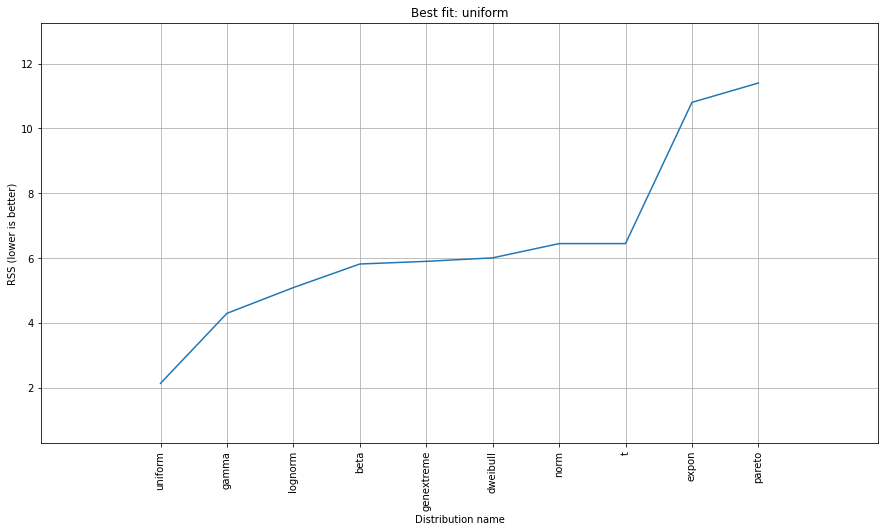

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2ad4818eb8>)

In [9]:
# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


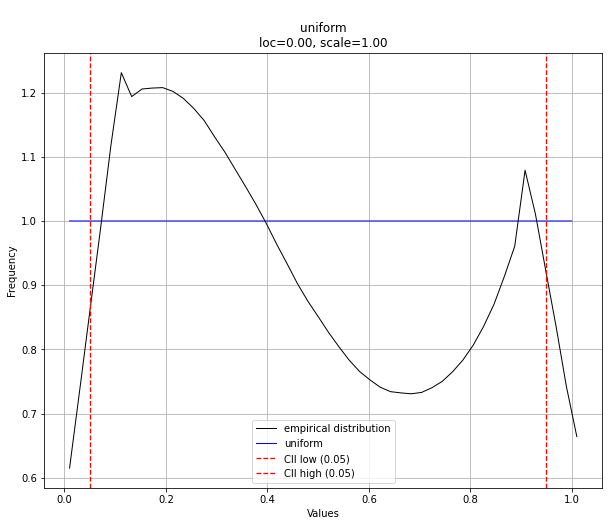

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2ad4741b00>)

In [12]:
# Make prediction on new datapoints based on the fit
dist.predict(np.random.rand(100))

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba

# Or in one dataframe
#dist.df

# The plot function will now also include the predictions of y
dist.plot()

In [36]:
df_beta.describe()

,beta_1,beta_2,beta_3,beta_4,beta_5
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.007261e-01,0.833731,0.250703,0.500434,0.286178
std,3.537000e-01,0.140656,0.193650,0.223040,0.159951
min,4.787024e-09,0.100670,0.000005,0.001997,0.000748
25%,1.459080e-01,0.758198,0.092484,0.327418,0.161139
50%,5.005708e-01,0.870965,0.206746,0.500572,0.264769
75%,8.543437e-01,0.944120,0.370508,0.672731,0.390459
max,1.000000e+00,1.000000,0.982107,0.999653,0.943434


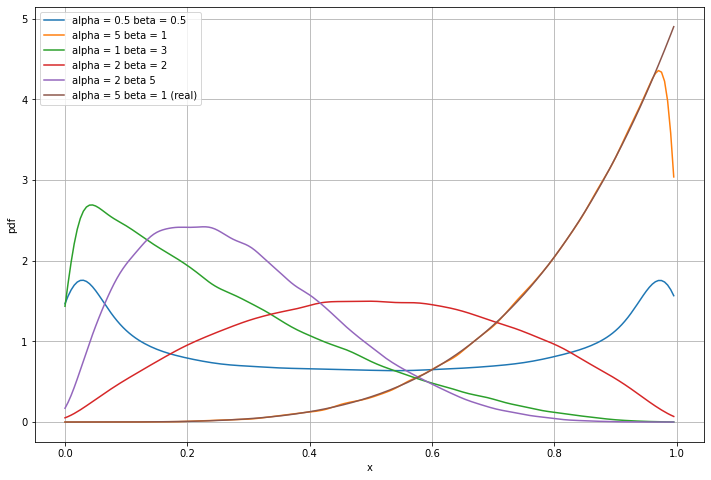

In [51]:


kde1 = gaussian_kde(df_beta['beta_1'].values)
kde2 = gaussian_kde(df_beta['beta_2'].values)
kde3 = gaussian_kde(df_beta['beta_3'].values)
kde4 = gaussian_kde(df_beta['beta_4'].values)
kde5 = gaussian_kde(df_beta['beta_5'].values)

x = np.arange(0, 1, 0.005)

y_pdf1 = kde1.pdf(x)
y_pdf2 = kde2.pdf(x)
y_pdf3 = kde3.pdf(x)
y_pdf4 = kde4.pdf(x)
y_pdf5 = kde5.pdf(x)

plt.figure(figsize=(12,8))
plt.plot(x, y_pdf1, label='alpha = 0.5 beta = 0.5')
plt.plot(x, y_pdf2, label='alpha = 5 beta = 1')
plt.plot(x, y_pdf3, label='alpha = 1 beta = 3')
plt.plot(x, y_pdf4, label='alpha = 2 beta = 2')
plt.plot(x, y_pdf5, label='alpha = 2 beta 5')

plt.plot(x, stats.beta.pdf(x, 5, 1), label='alpha = 5 beta = 1 (real)')
plt.legend()
plt.ylabel('pdf')
plt.xlabel('x')
plt.grid()
plt.show()